**Dataset Link:https://www.kaggle.com/datasets/mhantor/mri-based-brain-tumor-images**

**Import Libraries**

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import random
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown
# import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-01-09 22:51:35.903450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 22:51:35.903514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 22:51:35.905814: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Dataset Overview**

In [2]:
# Define paths
base_dir = '/kaggle/input/mri-based-brain-tumor-images/Brain MRI Images/Brain MRI Images'

# List contents of the base directory
print("Contents of base_dir:", os.listdir(base_dir))

# List contents of the Train and Validation directories
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
print("Contents of train_dir:", os.listdir(train_dir))
print("Contents of validation_dir:", os.listdir(validation_dir))


Contents of base_dir: ['Validation', 'Train']
Contents of train_dir: ['Tumor', 'Normal']
Contents of validation_dir: ['Tumor', 'Normal']


* This is the MRI Brain Tumor Images Dataset.
* It consists of Brain MRI Images Folder which have Train and validation Data.
* The Train directory consists of 'Tumor' and 'Normal'Images.
* The Validation Dirstory consists of also the 'Tumor' and 'Normal'Images.

In [3]:
import os

# Define the base directories
base_dir1 = '/kaggle/input/mri-based-brain-tumor-images/Brain MRI Images/Brain MRI Images'
base_dir2 = '/kaggle/input/mri-based-brain-tumor-images/Brain_tumor_images'

# Function to count images in a directory
def count_images(directory):
    num_images = 0
    for root, dirs, files in os.walk(directory):
        num_images += len([file for file in files if file.endswith(('jpg', 'jpeg', 'png', 'gif', 'bmp'))])
    return num_images

# List contents of the base directories
print("Contents of Brain MRI Images Folder:", os.listdir(base_dir1))
print("Contents of Brain_tumor_images Folder:", os.listdir(base_dir2))

# Define the Train and Validation directories for base_dir1
train_dir1 = os.path.join(base_dir1, 'Train')
validation_dir1 = os.path.join(base_dir1, 'Validation')

# Count images in Train/Validation/Normal/Tumor for base_dir1
print("Train/Normal images:", count_images(os.path.join(train_dir1, 'Normal')))
print("Train/Tumor images:", count_images(os.path.join(train_dir1, 'Tumor')))
print("Validation/Normal images:", count_images(os.path.join(validation_dir1, 'Normal')))
print("Validation/Tumor images:", count_images(os.path.join(validation_dir1, 'Tumor')))

# Count images in Normal/Tumor for base_dir2
normal_dir2 = os.path.join(base_dir2, 'Normal')
tumor_dir2 = os.path.join(base_dir2, 'Tumor')
print("Brain_tumor_images/Normal images:", count_images(normal_dir2))
print("Brain_tumor_images/Tumor images:", count_images(tumor_dir2))


Contents of Brain MRI Images Folder: ['Validation', 'Train']
Contents of Brain_tumor_images Folder: ['Tumor', 'Normal']
Train/Normal images: 136
Train/Tumor images: 184
Validation/Normal images: 34
Validation/Tumor images: 46
Brain_tumor_images/Normal images: 170
Brain_tumor_images/Tumor images: 230


**Lets Have a Sneakpeak at MRI Brain Images**

In [4]:
# Define paths
base_dir = '/kaggle/input/mri-based-brain-tumor-images/Brain MRI Images/Brain MRI Images'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

# Function to display images
def display_images(image_paths, title, n=10):
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(image_paths[:n]):
        plt.subplot(2, 5, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()


**Last 10 Normal Brain MRI Images from Train Folder**

**Last 10 Normal Images from Train Folder**

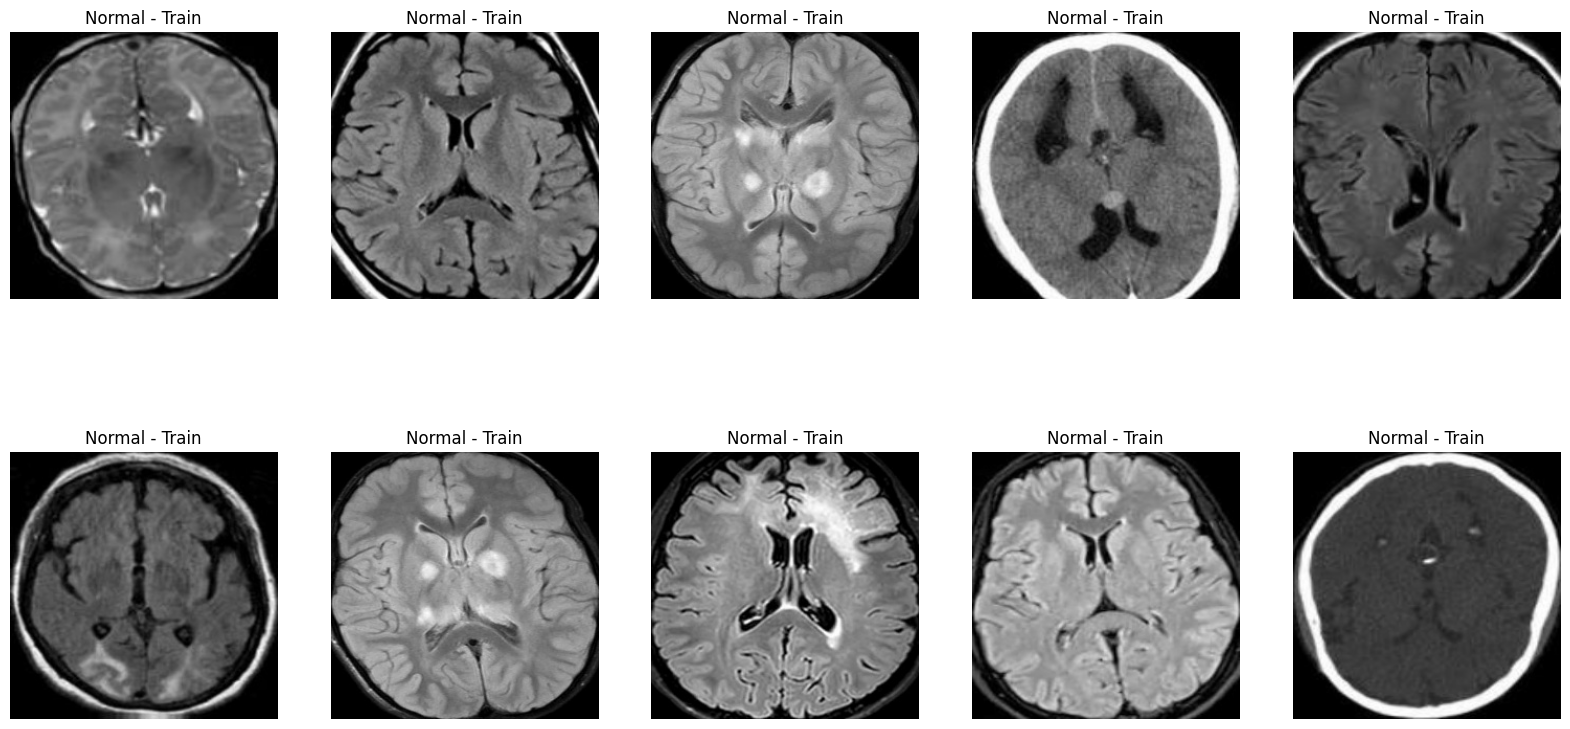

In [5]:
# Get the paths of the last 10 normal images in the Train folder
normal_train_dir = os.path.join(train_dir, 'Normal')
normal_train_images = [os.path.join(normal_train_dir, img) for img in os.listdir(normal_train_dir)]

# Display the images
display(Markdown("**Last 10 Normal Images from Train Folder**"))
display_images(normal_train_images, 'Normal - Train')


**Last 10 Tumor Images from Train Folder**

**Last 10 Tumor Images from Train Folder**

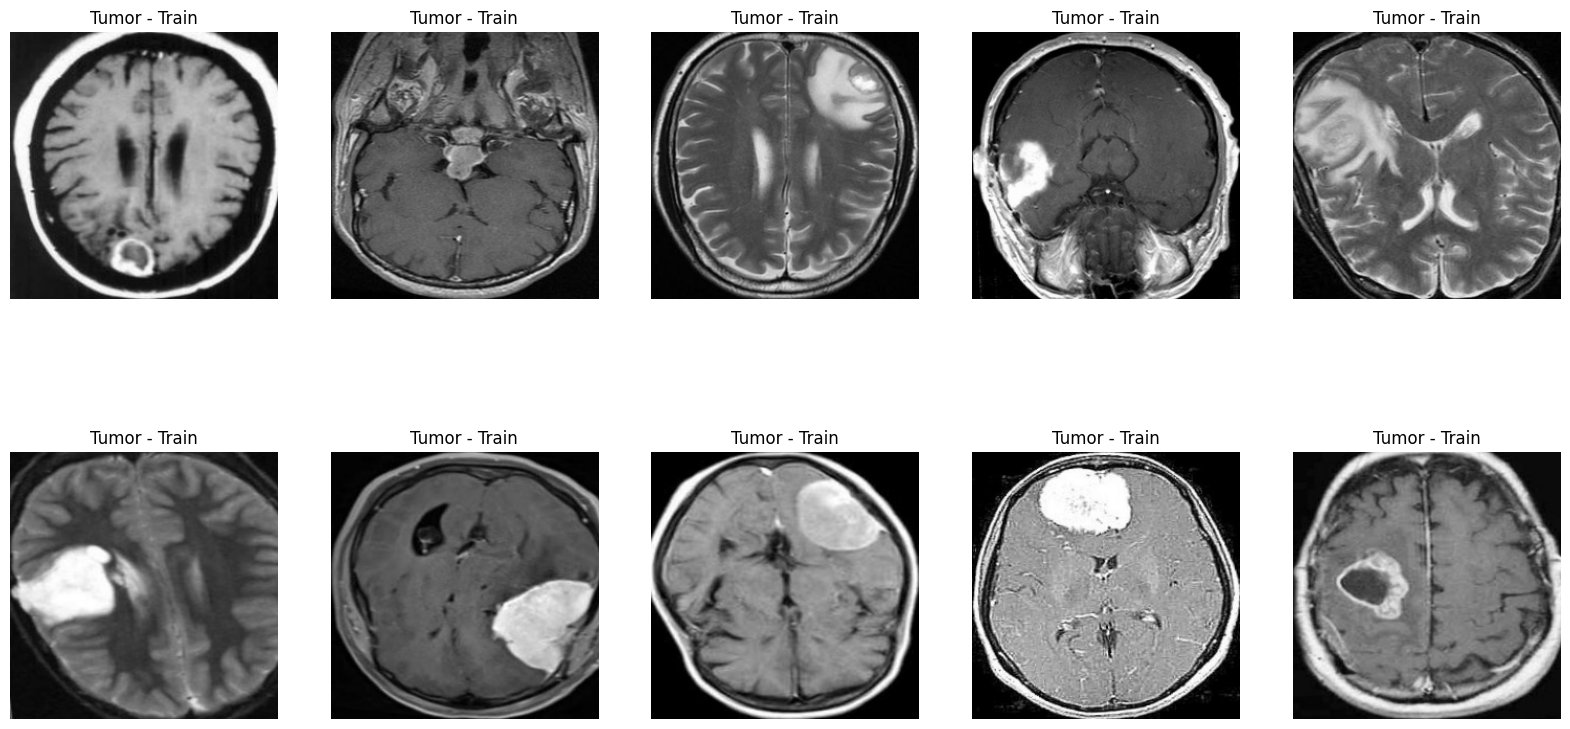

In [6]:
# Get the paths of the last 10 tumor images in the Train folder
tumor_train_dir = os.path.join(train_dir, 'Tumor')
tumor_train_images = [os.path.join(tumor_train_dir, img) for img in os.listdir(tumor_train_dir)]

# Display the images
display(Markdown("**Last 10 Tumor Images from Train Folder**"))
display_images(tumor_train_images, 'Tumor - Train')


**Data Preparation and Augmentation**

In [7]:
# Set random seeds for reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Paths to your data
train_dir = '/kaggle/input/mri-based-brain-tumor-images/Brain MRI Images/Brain MRI Images/Train'
val_dir = '/kaggle/input/mri-based-brain-tumor-images/Brain MRI Images/Brain MRI Images/Validation'

# Load datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary',
    shuffle=True,
    seed=SEED  # Ensure shuffle reproducibility
)

val_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary',
    shuffle=False  # No need to shuffle validation data
)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal', seed=SEED),
    tf.keras.layers.RandomRotation(0.3, seed=SEED),  # Increased rotation angle
    tf.keras.layers.RandomZoom(0.3, seed=SEED),  # Increased zoom range
    tf.keras.layers.RandomContrast(0.3, seed=SEED),  # Increased contrast range
    tf.keras.layers.RandomBrightness(0.3, seed=SEED),  # Increased brightness range
])

# Prefetching for performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)


Found 320 files belonging to 2 classes.
Found 80 files belonging to 2 classes.


**ResNet50 Model For MRI Brain Images Classification**

In [8]:
# Load a pretrained model
base_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='/kaggle/input/resnet50/tensorflow2/default/1/resnet50_weights_tf_dim_ordering_tf_kernels_notop (1).h5'
)

base_model.trainable = False  # Freeze the base model initially

# Build the model
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Adjust dropout rate
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adjust dropout rate
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Training and Evaluation**

In [9]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Initial training
initial_epochs = 20
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=initial_epochs,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model after initial training
loss, accuracy = model.evaluate(val_dataset)
print(f'Validation Loss after initial training: {loss}')
print(f'Validation Accuracy after initial training: {accuracy}')


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.5493 - loss: 1.1363 - val_accuracy: 0.7875 - val_loss: 0.4695 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6362 - loss: 0.8122 - val_accuracy: 0.8500 - val_loss: 0.4172 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.7284 - loss: 0.6229 - val_accuracy: 0.8500 - val_loss: 0.3562 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6958 - loss: 0.5616 - val_accuracy: 0.9375 - val_loss: 0.3247 - learning_rate: 0.0010
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7157 - loss: 0.5057 - val_accuracy: 0.8875 - val_loss: 0.3163 - learning_rate: 0.0010
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.7394 - loss: 0.4941 - val_accuracy: 0.9250 - val_loss: 0.3077 - learning_rate: 0.0010
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7895 - loss: 0.4248 - val_accuracy: 

**Analyzing Training and Validation Accuracy and Loss**

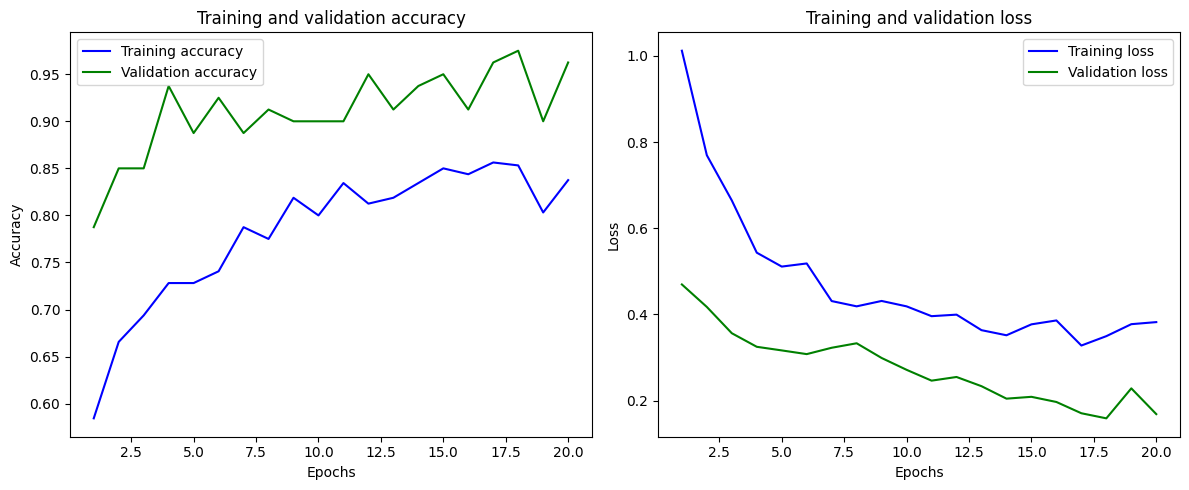

In [10]:
# Plotting the training and validation metrics
def plot_metrics(history):
    # Get the history from the training process
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Number of epochs
    epochs = range(1, len(acc) + 1)
    
    # Plotting accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(history)
